# Project 4: West Nile Virus Prediction
____________

# Part 1c - Weather Data EDA & Cleaning


### Group 4, SG-DSI-18

In this notebook, we will be cleaning and analyzing the weather data.

Weather dataset is important as there are several meteorological conditions which affect mosquito activities. 

Example of the conditions are wind, temperature, humidity, precipitation, drought and rainfall.

## Problem Statement

West Nile Virus (Wnv), a mosquito-bourne arbovirus, has been causing significant and sometimes severe human diseases. Although pesticides are known to be effective in dealing with the virus-carrying mosquitoes, it is expensive to deploy pesticides throughout the city. As data scientists in the Division of Societal Cures in Epidemiology & New Creative Engineering, we want to understand the factors driving the spread of Wnv by leveraging on data collected by Chicago's weather stations and the surveillance system set up by the Chicago Department of Public Health. We also want to develop a classfication model that could predict the presence of Wnv within the area of Windy City. Through these studies, we hope to suggest a cost-efficient and effective method of deploying pesticides within the area.

### Contents:
- [EDA & Cleaning](#EDA-&-Cleaning)
- [Feature Engineering](#Feature-Engineering)

### Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime
from suntime import Sun, SunTimeException
from pytz import timezone
import pytz

In [2]:
url = '../datasets/weather.csv'

In [3]:
 weather = pd.read_csv(url)

## EDA & Cleaning

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None) 

In [5]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [6]:
weather.shape      

(2944, 22)

In [7]:
for item in zip(list(range(len(weather.columns))), weather.columns):
    print(item)

(0, 'Station')
(1, 'Date')
(2, 'Tmax')
(3, 'Tmin')
(4, 'Tavg')
(5, 'Depart')
(6, 'DewPoint')
(7, 'WetBulb')
(8, 'Heat')
(9, 'Cool')
(10, 'Sunrise')
(11, 'Sunset')
(12, 'CodeSum')
(13, 'Depth')
(14, 'Water1')
(15, 'SnowFall')
(16, 'PrecipTotal')
(17, 'StnPressure')
(18, 'SeaLevel')
(19, 'ResultSpeed')
(20, 'ResultDir')
(21, 'AvgSpeed')


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

### Cleaning the Missing Values

Although we observed from `.info()` that there are no null values, it is because the missing values are indicated as 'M' in the dataset.

We want to map these values as `np.nan` for now so that we can detect them.

In [9]:
# Map all 'M' values as NaN
for col in weather.columns:
    weather[col] = weather[col].map(lambda x: np.nan if x == 'M' else x)

In [10]:
# See the columns with null values
pd.set_option('display.max_rows', None)
mv = weather.isnull().sum().sort_values(ascending=False)
# Filter out missing values
mv = mv[mv.values > 0]
mv_percent = mv / weather.shape[0] * 100
pd.concat([mv, mv_percent], axis=1, keys=['Total', 'Percentage'])

,Total,Percentage
Water1,2944,100.000000
Depart,1472,50.000000
SnowFall,1472,50.000000
Depth,1472,50.000000
Tavg,11,0.373641
Cool,11,0.373641
Heat,11,0.373641
SeaLevel,9,0.305707
StnPressure,4,0.135870
WetBulb,4,0.135870


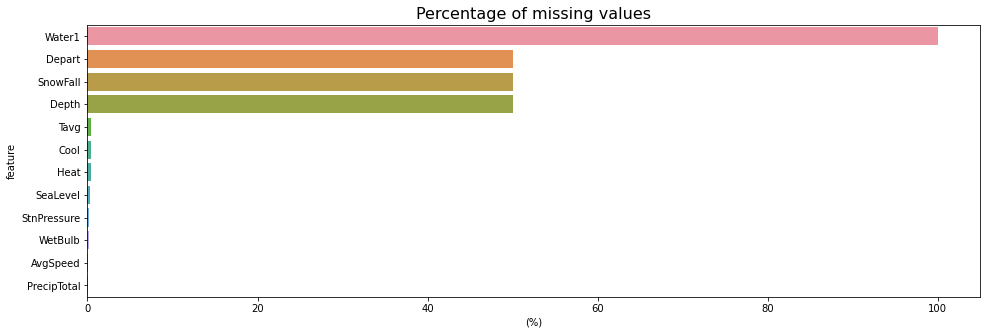

In [11]:
# Plot the missing values using a bar plot
fig, ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(mv_percent.values,mv_percent.index)
ax.set_xlabel('(%)')
ax.set_ylabel('feature')
ax.set_title('Percentage of missing values', fontsize=16);

We chose to drop the columns with missing values comprising at least 50% of the dataset since these columns do not have variable data and will not be a good predictor feature for the model later on.

Columns dropped are Water1, Depart, SnowFall and Depth.

In [12]:
# Drop columns
weather.drop(columns=['Water1', 'SnowFall', 'Depth','Depart'], inplace=True)

In [13]:
# Check after dropping columns
weather.shape

(2944, 18)

We observe that there are data with a small percentage of missing values (<5% of dataset). We can choose to either drop these row data or impute values.

#### PrecipTotal's trace values

Trace denotes that there is an amount of precipitation, which is greater than zero but is too small to be measured. Therefore, As the lowest value in PrecipTotal is 0 and the second lowest is 0.01, we will choose the median,0.05 and replace the T values.

In [14]:
weather['PrecipTotal'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
0.04      36
0.05      32
0.08      28
0.12      28
0.06      27
0.07      23
0.16      21
0.09      21
0.14      20
0.11      20
0.17      17
0.28      15
0.19      14
0.13      14
0.18      14
0.20      13
0.15      13
0.23      11
0.25      11
0.26      11
0.10      10
0.24      10
0.29       9
0.40       9
0.39       9
0.43       9
0.21       9
0.31       9
0.22       8
0.34       8
0.32       8
0.48       7
0.33       7
0.59       7
0.37       7
0.45       7
0.41       7
0.30       7
0.50       7
0.65       6
0.80       6
0.27       6
0.84       6
0.63       6
0.44       5
0.54       5
0.93       5
0.85       5
0.68       5
0.36       5
0.92       5
0.97       4
0.58       4
0.64       4
0.70       4
0.75       4
0.52       4
1.23       4
0.51       4
0.55       4
0.72       4
0.89       4
0.66       4
1.31       3
1.05       3
0.87       3
0.71       3
0.47       3
0.74       3
0.60       3
0.35       3
0.88       3

In [15]:
# PrecipTotal
# Replace T with 0.005
weather.loc[weather['PrecipTotal'] == '  T', 'PrecipTotal'] = 0.005

#### Sunrise/Sunset

Sunrise's and sunset's values of station 2 are missing. We will be calculating them using the suntime module and adjusting them with the daylight saving calculation.

Calculation for sunrise/sunset based on the following [reference](https://stackoverflow.com/questions/38986527/sunrise-and-sunset-time-in-python/38986561).

Daylight savings for calculations need to be considered based on [reference](https://www.timeanddate.com/time/zone/usa/chicago).

In [16]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,0,3,-,-,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,47,13,0,-,-,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9


In [17]:
# Convert date to datetime format
weather['Date'] = pd.to_datetime(weather['Date'])

In [18]:
# Check single entry
weather['Date'][0]

Timestamp('2007-05-01 00:00:00')

In [19]:
# Extract sunrise/sunset values for Station 2
# This is the location of Station 2
latitude = 41.786
longitude = -87.752

sun = Sun(latitude, longitude)

central = timezone('US/Central')

sunrise_list = []
sunset_list = []
for value in weather['Date']:
    abd = value
    abd_sr = sun.get_local_sunrise_time(value, local_time_zone=central)
    abd_sr = abd_sr - abd_sr.dst()
    abd_ss = sun.get_local_sunset_time(value, local_time_zone=central)
    abd_ss = abd_ss - abd_ss.dst()
    sunrise_list.append(abd_sr.strftime('%H%M'))
    sunset_list.append(abd_ss.strftime('%H%M'))

In [20]:
# Impute values
index = weather.loc[weather['Station']==2].index
for i in index:
    weather.loc[i, 'Sunrise'] = sunrise_list[i]
    weather.loc[i, 'Sunset'] = sunset_list[i]

In [21]:
# Check updated fram
weather[['Sunrise', 'Sunset']][weather['Station']==2]

,Sunrise,Sunset
1,0448,1849
3,0447,1850
5,0445,1851
7,0444,1852
9,0443,1853
11,0442,1854
13,0440,1855
15,0439,1856
17,0438,1858
19,0437,1859


The timings of sunrise and sunset may not be significant to the mosquitoes, since their breeding activities are affected by the conditions of the day instead. As such, we want to create a new feature `sun_hours` which would explain the duration of the day, or number of hours where the Sun is out.

In [22]:
# Convert values to datetime
# sunrise_time = [datetime.datetime.strptime(val, '%H%M') for val in weather['Sunrise']]
# sunset_time = [datetime.datetime.strptime(val, '%H%M') for val in weather['Sunset']]

sunrise_time = []
for val in weather['Sunrise']:
    date_val = datetime.datetime.strptime(val, '%H%M')
    sunrise_time.append(date_val.hour + date_val.minute/60)

sunset_time = []
for val in weather['Sunset']:
    try:
        date_val = datetime.datetime.strptime(val, '%H%M')
        sunset_time.append(date_val.hour + date_val.minute/60)
    except:
        date_val = datetime.datetime.strptime(val.replace('60', '59'), '%H%M')
        sunset_time.append(date_val.hour + date_val.minute/60)

# Transform values to hours from midnight
weather['Sunrise'] = sunrise_time
weather['Sunset'] = sunset_time

In [23]:
# Create new feature for sun hours
weather['SunHours'] = weather['Sunset'] - weather['Sunrise']

In [27]:
# Drop Sunrise and Sunset since we have SunHours
weather.drop(columns=['Sunrise', 'Sunset'], inplace=True)

In [28]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,SunHours
0,1,2007-05-01,83,50,67,51,56,0,2,,0.00,29.10,29.82,1.7,27,9.2,14.016667
1,2,2007-05-01,84,52,68,51,57,0,3,,0.00,29.18,29.82,2.7,25,9.6,14.016667
2,1,2007-05-02,59,42,51,42,47,14,0,BR,0.00,29.38,30.09,13.0,4,13.4,14.050000
3,2,2007-05-02,60,43,52,42,47,13,0,BR HZ,0.00,29.44,30.08,13.3,2,13.4,14.050000
4,1,2007-05-03,66,46,56,40,48,9,0,,0.00,29.39,30.12,11.7,7,11.9,14.083333


#### Convert values to float

We will convert all features' except Date,CodeSum,Sunset, Sunrise and Station, values to float type for better analysis.

In [29]:
float_cols = [col for col in weather.columns if col not in ['Date', 'CodeSum', 'Station','Sunset','Sunrise']]
weather[float_cols] = weather[float_cols].astype('float')

In [30]:
# Check dtypes
weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                  float64
Tmin                  float64
Tavg                  float64
DewPoint              float64
WetBulb               float64
Heat                  float64
Cool                  float64
CodeSum                object
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir             float64
AvgSpeed              float64
SunHours              float64
dtype: object

In [31]:
weather.isnull().sum()

Station         0
Date            0
Tmax            0
Tmin            0
Tavg           11
DewPoint        0
WetBulb         4
Heat           11
Cool           11
CodeSum         0
PrecipTotal     2
StnPressure     4
SeaLevel        9
ResultSpeed     0
ResultDir       0
AvgSpeed        3
SunHours        0
dtype: int64

#### Tavg

Tavg is indicating the average temperature of the day. Therefore, for the missing values, it will be inputted by getting the mean of Tmax and Tmin.

In [32]:
#Getting the missing Tavg Values
missing_index = weather[weather['Tavg'].isnull()].index
missing_index

Int64Index([7, 505, 675, 1637, 2067, 2211, 2501, 2511, 2525, 2579, 2811], dtype='int64')

In [33]:
#Replacing with the mean of Tmax and Tmin of the day
weather['Tavg'].loc[missing_index] = round((weather['Tmax'].loc[missing_index] + weather['Tmin'].loc[missing_index])/2)

C:\Users\riche\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
weather['Tavg'].isnull().sum()

0

In [35]:
# Remove Tmax and Tmin since we have Tavg
weather.drop(columns=['Tmax', 'Tmin'], inplace=True)

#### SeaLevel

In this section, we will look at the missing data of Sea Level. We will plot a boxplot to study the range of values.

Text(0.5, 1.0, 'Range of Sea Level values')

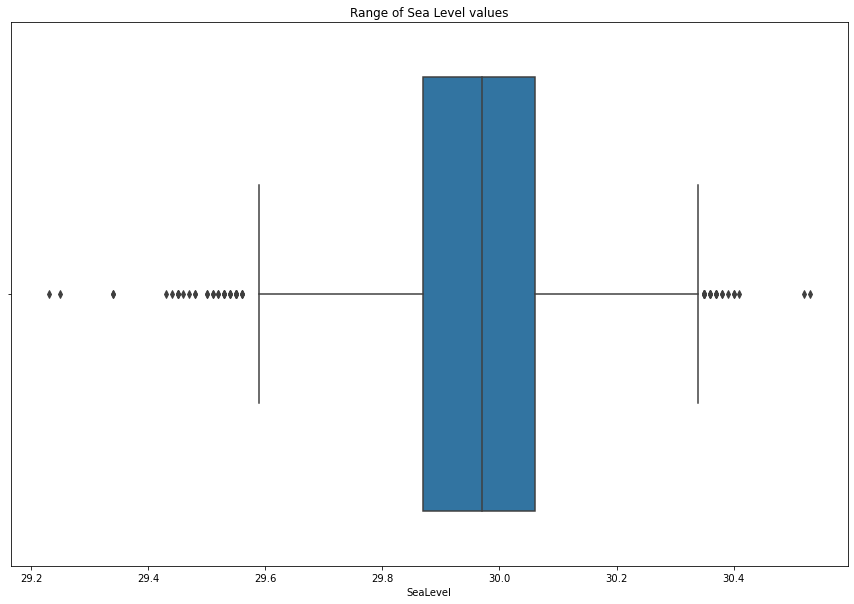

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(weather['SeaLevel'])
plt.title('Range of Sea Level values')

In [37]:
weather['SeaLevel'].describe()

count    2935.000000
mean       29.968129
std         0.158597
min        29.230000
25%        29.870000
50%        29.970000
75%        30.060000
max        30.530000
Name: SeaLevel, dtype: float64

Based on the above box plot, there are a lot of outliers. Looking at the description, the maximum value is 30.53 and the minimum value is 29.23. In this case, we will use the median to replace the null values.

In [38]:
#Replacing Sealevel null values with median
weather['SeaLevel'] = weather['SeaLevel'].fillna(weather['SeaLevel'].median())

#### StnPressure

Below, we will look at the missing values of Station Pressure.

Text(0.5, 1.0, 'Distribution of Station Pressure values')

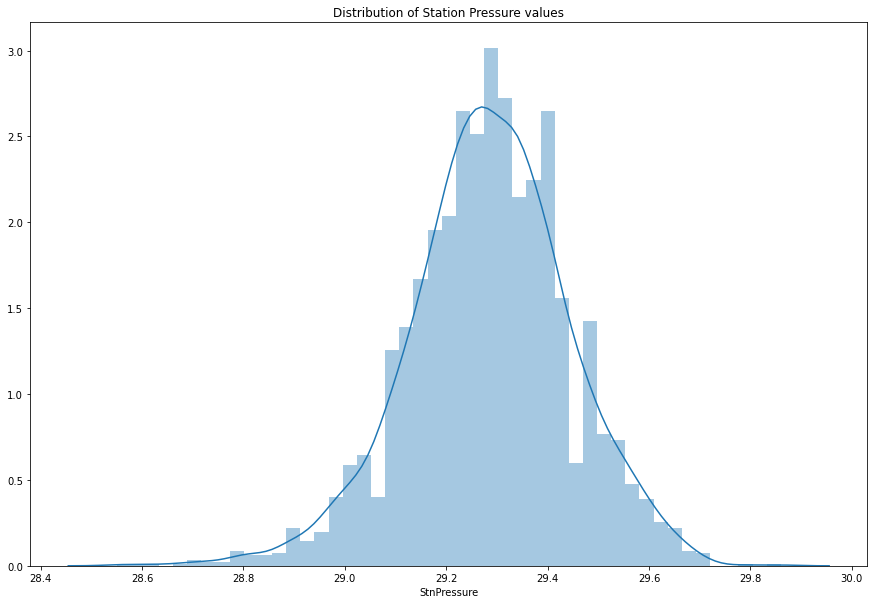

In [39]:
plt.figure(figsize=(15,10))
sns.distplot(weather['StnPressure'])
plt.title('Distribution of Station Pressure values')

In [40]:
weather['StnPressure'].describe()

count    2940.000000
mean       29.284429
std         0.158543
min        28.550000
25%        29.190000
50%        29.280000
75%        29.390000
max        29.860000
Name: StnPressure, dtype: float64

Based on the dist plot above, we can see most of the values are between 29.0 to 29.6. In the description above, the lowest value is 28.55 and highest is 29.86. In this case, we will use the median to fill in the null values.

In [41]:
weather['StnPressure'] = weather['StnPressure'].fillna(weather['StnPressure'].median())

#### WetBulb

Below, we will look at the wet bulb values.

Text(0.5, 1.0, 'Range of Wet Bulb values')

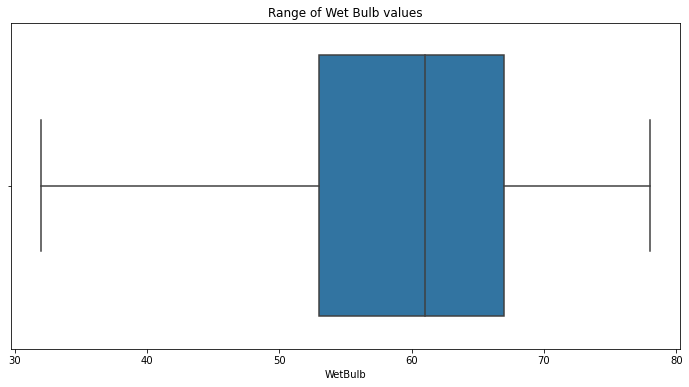

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(weather['WetBulb'])
plt.title('Range of Wet Bulb values')

In [43]:
weather['WetBulb'].describe()

count    2940.000000
mean       59.310884
std         9.286742
min        32.000000
25%        53.000000
50%        61.000000
75%        67.000000
max        78.000000
Name: WetBulb, dtype: float64

Based on the box plot above, most of the values are between 55 - 65. In the description, the min value is 32 and the max value is 78. In this case, we will use median to fill in the null values.

In [44]:
weather['WetBulb'] = weather['WetBulb'].fillna(weather['WetBulb'].median())

#### AvgSpeed

Below, we will study the missing value of average speed.

Text(0.5, 1.0, 'Range of Average Speed values')

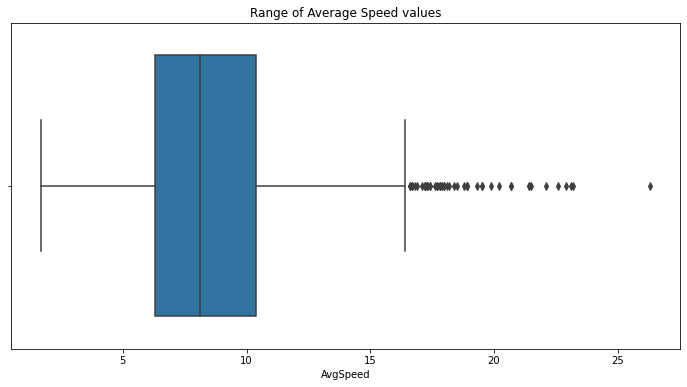

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(weather['AvgSpeed'])
plt.title('Range of Average Speed values')

In [46]:
weather['AvgSpeed'].describe()

count    2941.000000
mean        8.580449
std         3.147300
min         1.700000
25%         6.300000
50%         8.100000
75%        10.400000
max        26.300000
Name: AvgSpeed, dtype: float64

In [47]:
weather['AvgSpeed'].isnull().sum()

3

Based on the plot, there are a number of outliers. Most of the values are between 1 to 17. Max value is 26.3 and min value is 1.7. There are only three missing values. In this case, we will input the null values with the median.

In [48]:
weather['AvgSpeed'] = weather['AvgSpeed'].fillna(weather['AvgSpeed'].median())

#### PrecipTotal

Since there is a very small percentage of missing 'PrecipTotal' values, we will impute it with zeroes.

Text(0.5, 1.0, 'Distribution of Preciptation Total values')

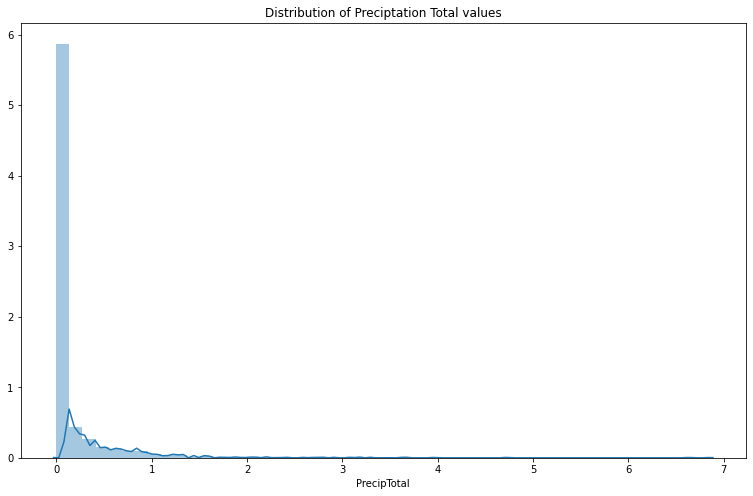

In [49]:
plt.figure(figsize=(13,8))
sns.distplot(weather['PrecipTotal'])
plt.title('Distribution of Preciptation Total values')

In [50]:
weather['PrecipTotal'].describe()

count    2942.000000
mean        0.131869
std         0.393150
min         0.000000
25%         0.000000
50%         0.000000
75%         0.060000
max         6.860000
Name: PrecipTotal, dtype: float64

In [51]:
weather['PrecipTotal'].isnull().sum()

2

Based on the plot, the distribution of precip total is very skewed to the right. Most of the values are 0. There are only two null values. In this case, we will input the null values as 0.

In [52]:
# Impute with zero
weather['PrecipTotal'] = weather['PrecipTotal'].fillna(0)

#### Heat

Text(0.5, 1.0, 'Distribution of Heat values')

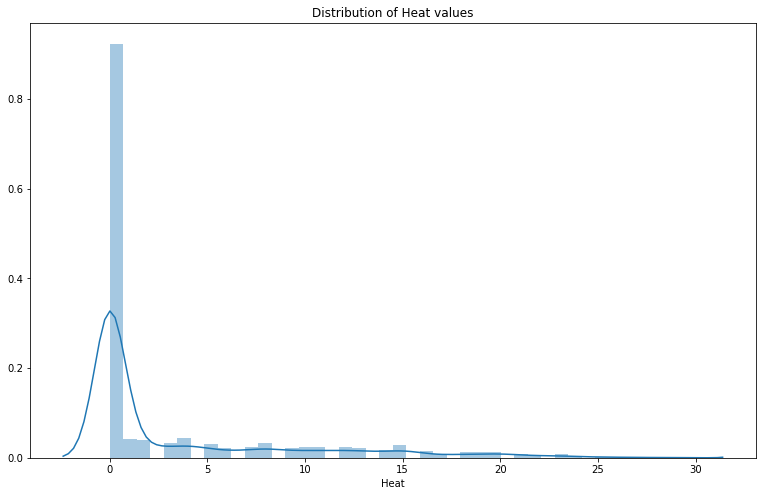

In [53]:
plt.figure(figsize=(13,8))
sns.distplot(weather['Heat'])
plt.title('Distribution of Heat values')

In [54]:
weather['Heat'].describe()

count    2933.000000
mean        3.407092
std         5.953203
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max        29.000000
Name: Heat, dtype: float64

Based on the plot and description above, most of the heat values are zero or close to zero. Therefore, the null values will be replaced as zero.

In [55]:
weather['Heat'] = weather['Heat'].fillna(0)

#### Cool

Text(0.5, 1.0, 'Distribution of Cool values')

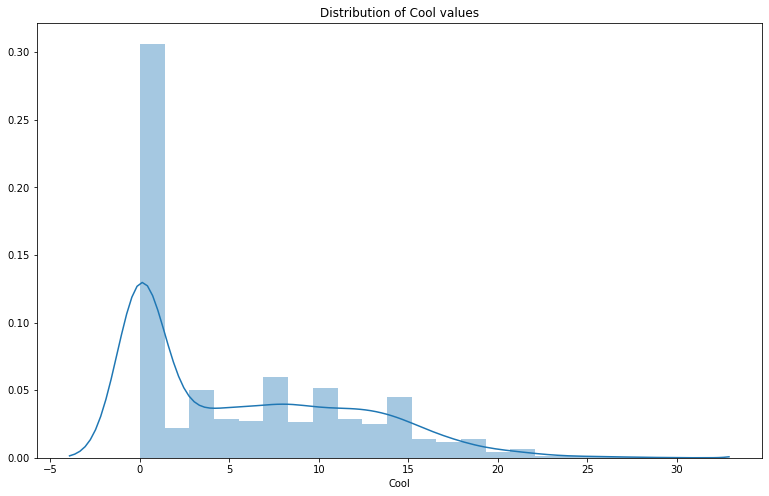

In [56]:
plt.figure(figsize=(13,8))
sns.distplot(weather['Cool'])
plt.title('Distribution of Cool values')

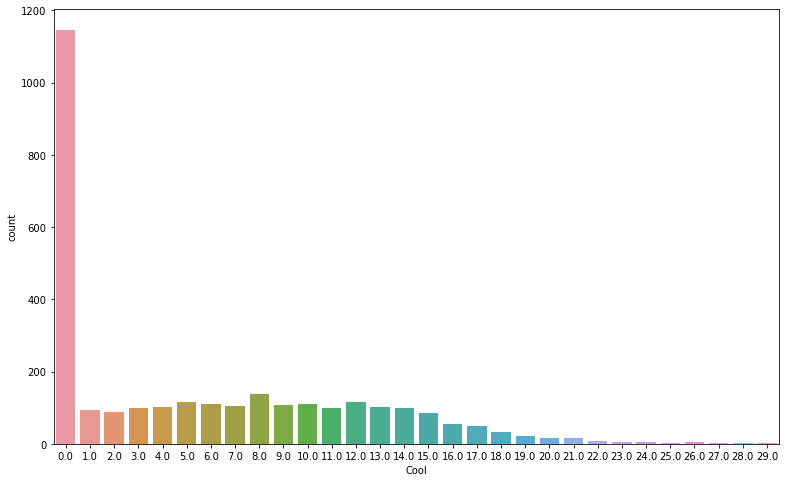

In [57]:
plt.figure(figsize=(13,8))
sns.countplot(weather['Cool'])

In [58]:
weather['Cool'].describe()

count    2933.000000
mean        5.647119
std         6.105087
min         0.000000
25%         0.000000
50%         4.000000
75%        10.000000
max        29.000000
Name: Cool, dtype: float64

Based on the plots and description above, most of the cool values are zero or close to zero. Therefore, the null values will be replaced as zero.

In [59]:
weather['Cool'] = weather['Cool'].fillna(0)

In [60]:
weather.isnull().sum()

Station        0
Date           0
Tavg           0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
CodeSum        0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
SunHours       0
dtype: int64

However, for analysis, we will not require Heat and Cool since they are derived from the average temperature. Average temperature would be able the same information as them.

In [61]:
# Drop Heat and Cool
weather.drop(columns=['Heat', 'Cool'], inplace=True)

## Feature Engineering

Besides creating a new `sunHours` feature, we want to explore how we can further change the other features as well.

### Code Sums

Code Sums is a feature in the weather data which indicate the weather conditions of the day. Below are the different type of conditions and its abbreviation.

Conditions:

- +FC TORNADO/WATERSPOUT
- FC FUNNEL CLOUD
- TS THUNDERSTORM
- GR HAIL
- RA RAIN 
- DZ DRIZZLE
- SN SNOW
- SG SNOW GRAINS
- GS SMALL HAIL &/OR SNOW PELLETS
- PL ICE PELLETS
- IC ICE CRYSTALS
- FG+ HEAVY FOG (FG & LE.25 MILES VISIBILITY)
- FG FOG
- BR MIST
- UP UNKNOWN PRECIPITATION
- HZ HAZE
- FU SMOKE
- VA VOLCANIC ASH
- DU WIDESPREAD DUST
- DS DUSTSTORM
- PO SAND/DUST WHIRLS
- SA SAND
- SS SANDSTORM
- PY SPRAY
- SQ SQUALL
- DR LOW DRIFTING
- SH SHOWER
- FZ FREEZING
- MI SHALLOW
- PR PARTIAL
- BC PATCHES
- BL BLOWING
- VC VICINITY
 - LIGHT
 + HEAVY
 "NO SIGN" MODERATE
 
The large number of unique weather codes are too specific and not very intepretable. Based on research, we know that mosquitoes normally thrive when the environment is wet. Therefore, we want to map these weather codes to either wet or dry. We do this by mapping them to values or either 0 (dry) or 1 (wet).

In [62]:
# Creating of features for each condition in codesum
code_sums = []
wet_codes = ['RA', 'TS', 'DZ', 'BR', 'UP', 'SH']

for code in weather['CodeSum']:
    code.replace('+', ' ')
    code_row = code.split()
    check_wet = 0
    for val in code_row:
        val_2 = None
        if len(val) > 2:
            val_1 = val[:2]
            val_2 = val[2:]
        else:
            val_1 = val
        
        if val_1 in wet_codes or val_2 in wet_codes:
            check_wet = 1

    code_sums.append(check_wet)

In [63]:
# Copying dataset
weather_final = weather.copy()

# Replace CodeSum column
weather_final['CodeSum'] = code_sums
weather_final.rename(columns={'CodeSum': 'WetDry'}, inplace=True)

In [64]:
# View dataframe after updates
weather_final.head()

,Station,Date,Tavg,DewPoint,WetBulb,WetDry,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,SunHours
0,1,2007-05-01,67.0,51.0,56.0,0,0.0,29.10,29.82,1.7,27.0,9.2,14.016667
1,2,2007-05-01,68.0,51.0,57.0,0,0.0,29.18,29.82,2.7,25.0,9.6,14.016667
2,1,2007-05-02,51.0,42.0,47.0,1,0.0,29.38,30.09,13.0,4.0,13.4,14.050000
3,2,2007-05-02,52.0,42.0,47.0,1,0.0,29.44,30.08,13.3,2.0,13.4,14.050000
4,1,2007-05-03,56.0,40.0,48.0,0,0.0,29.39,30.12,11.7,7.0,11.9,14.083333


### Humidity Feature
Humidity is important to mosquito activity. High Humidity conditions favor mosquito activity, while low humidity suppresses activity and may even cause mortality.

Therefore, we will be creating the humidity feature using [dewpoint](https://en.wikipedia.org/wiki/Dew_point).

In [65]:
weather_final['Humidity'] = np.round(100-25/9*(weather_final['Tavg']-weather_final['DewPoint']),1)

In [66]:
weather_final['Humidity'].describe()

count    2944.000000
mean       61.717867
std        14.350547
min         8.300000
25%        52.800000
50%        61.100000
75%        72.200000
max       105.600000
Name: Humidity, dtype: float64

In [67]:
weather_final.loc[weather_final['Humidity']>100,'Humidity'] = 100

In [68]:
# Drop DewPoint
weather_final.drop(columns=['DewPoint'], inplace=True)

### Time-Lag Features

Next, we will set up weekly average for the five conditions which will affect the growth of mosquitoes numbers. The five conditions are temperature, precipitation, wind speed, humidity and sunlight duration.

As mosquitoes require one to eight weeks duration to be incubated and grow, we will create a time-lag average variable based on the five conditions each. We will take a duration of six weeks for the time-lag. [[source](https://www.cdc.gov/dengue/resources/factsheets/mosquitolifecyclefinal.pdf)] 

In [69]:
# Add week and Year columns
weather_final['Week'] = (weather_final['Date'].dt.strftime('%W')).astype(int)
weather_final['Year'] = (weather_final['Date'].dt.strftime('%Y')).astype(int)

In [70]:
def year_week(row):
    week = row['Week']
    year = row['Year']
    row['YearWeek'] = f'{year}{week}'
    row['YearWeek'] = int(row['YearWeek'])
    return row

In [71]:
weather_final = weather_final.apply(year_week, axis=1)

#### Weekly Average Conditions

Add a variable for the average conditions over the week.

In [72]:
# Grouped df to obtain average
# Split into each station
group_df_1 = weather_final.loc[weather_final['Station']==1].groupby('YearWeek').mean()
group_df_2 = weather_final.loc[weather_final['Station']==2].groupby('YearWeek').mean()
group_df_1.drop(columns=['Week', 'Year'], inplace=True)
group_df_2.drop(columns=['Week', 'Year'], inplace=True)

In [73]:
group_df_1.head()

,Station,Tavg,WetBulb,WetDry,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,SunHours,Humidity
YearWeek,,,,,,,,,,,,
200718,1.0,58.500000,49.333333,0.333333,0.001667,29.358333,30.078333,10.483333,10.666667,12.050000,14.111111,49.550000
200719,1.0,63.428571,54.571429,0.571429,0.019286,29.341429,30.070000,6.600000,10.714286,8.642857,14.361905,51.171429
200720,1.0,61.571429,50.571429,0.428571,0.084286,29.355714,30.078571,10.028571,20.000000,11.814286,14.600000,42.871429
200721,1.0,67.142857,57.571429,0.428571,0.153571,29.382857,30.105714,8.457143,16.714286,10.428571,14.819048,50.400000
200722,1.0,72.142857,63.857143,0.857143,0.036429,29.207143,29.934286,6.585714,18.571429,7.542857,14.983333,62.285714


#### Time-Lag Features

Using the newly created weekly averages, we want to create time-lag features for 1-6 weeks.

In [74]:
timelag_cols = [col for col in weather_final if col not in ['Station', 'Date', 'Week', 'Year', 'YearWeek']]
timelag_cols

['Tavg',
 'WetBulb',
 'WetDry',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'SunHours',
 'Humidity']

In [75]:
# Add in weekly averages into weather df
for col in timelag_cols:
    new_col = 'Week' + col
    weather_final[new_col] = 1
    for yw in group_df_1.index:
        weather_final.loc[weather_final['YearWeek']==yw, new_col] = group_df_1.loc[yw, col]
        
    for yw in group_df_2.index:
        weather_final.loc[weather_final['YearWeek']==yw, new_col] = group_df_2.loc[yw, col]

In [76]:
weather_final.head()

,Station,Date,Tavg,WetBulb,WetDry,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,SunHours,Humidity,Week,Year,YearWeek,WeekTavg,WeekWetBulb,WeekWetDry,WeekPrecipTotal,WeekStnPressure,WeekSeaLevel,WeekResultSpeed,WeekResultDir,WeekAvgSpeed,WeekSunHours,WeekHumidity
0,1,2007-05-01,67.0,56.0,0,0.0,29.10,29.82,1.7,27.0,9.2,14.016667,55.6,18,2007,200718,60.333333,50.0,0.166667,0.000833,29.42,30.071667,10.666667,9.5,12.1,14.111111,45.383333
1,2,2007-05-01,68.0,57.0,0,0.0,29.18,29.82,2.7,25.0,9.6,14.016667,52.8,18,2007,200718,60.333333,50.0,0.166667,0.000833,29.42,30.071667,10.666667,9.5,12.1,14.111111,45.383333
2,1,2007-05-02,51.0,47.0,1,0.0,29.38,30.09,13.0,4.0,13.4,14.050000,75.0,18,2007,200718,60.333333,50.0,0.166667,0.000833,29.42,30.071667,10.666667,9.5,12.1,14.111111,45.383333
3,2,2007-05-02,52.0,47.0,1,0.0,29.44,30.08,13.3,2.0,13.4,14.050000,72.2,18,2007,200718,60.333333,50.0,0.166667,0.000833,29.42,30.071667,10.666667,9.5,12.1,14.111111,45.383333
4,1,2007-05-03,56.0,48.0,0,0.0,29.39,30.12,11.7,7.0,11.9,14.083333,55.6,18,2007,200718,60.333333,50.0,0.166667,0.000833,29.42,30.071667,10.666667,9.5,12.1,14.111111,45.383333


In [77]:
## FUNCTIONS
# Lag avg temp
def create_templag(row):   
    # Getting average temperature one week before
    YearWeek = row['YearWeek']
    
    # Calculating average temperature for up to four weeks before
    for i in range(4):
        try:
            row[f'templag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekTavg'].unique()[0]
            
        # For the first 4 weeks of the year where no previous data exists, create rough estimate of temperatures
        except IndexError:
            row[f'templag{i+1}'] = row['WeekTavg'] - i
    return row

# Lag avg WetBulb
def create_wetbulblag(row):   
    YearWeek = row['YearWeek']
    
    for i in range(4):
        try:
            row[f'wetbulblag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekWetBulb'].unique()[0]
        except IndexError:
            row[f'wetbulblag{i+1}'] = row['WeekWetBulb'] - i
    return row

# Lag avg WetDry
def create_wetdrylag(row):   
    YearWeek = row['YearWeek']
    
    for i in range(4):
        try:
            row[f'wetdrylag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekWetDry'].unique()[0]
        except IndexError:
            row[f'wetdrylag{i+1}'] = row['WeekWetDry'] - i
    return row

# Lag avg precip
def create_preciplag(row):   
    YearWeek = row['YearWeek']
    
    for i in range(4):
        try:
            row[f'preciplag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekPrecipTotal'].unique()[0]
        except IndexError:
            row[f'preciplag{i+1}'] = row['WeekPrecipTotal'] - i
    return row

# Lag avg stnpressure
def create_stnpressurelag(row):   
    YearWeek = row['YearWeek']
    
    for i in range(4):
        try:
            row[f'stnpressurelag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekStnPressure'].unique()[0]
        except IndexError:
            row[f'stnpressurelag{i+1}'] = row['WeekStnPressure'] - i
    return row

# Lag avg sealevel
def create_sealevellag(row):   
    YearWeek = row['YearWeek']
    
    for i in range(4):
        try:
            row[f'sealevellag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekSeaLevel'].unique()[0]
        except IndexError:
            row[f'sealevellag{i+1}'] = row['WeekSeaLevel'] - i
    return row

# Lag avg result speed
def create_resultspdlag(row):   
    YearWeek = row['YearWeek']
    
    for i in range(4):
        try:
            row[f'resultspdlag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekResultSpeed'].unique()[0]
        except IndexError:
            row[f'resultspdlag{i+1}'] = row['WeekResultSpeed'] - i
    return row

# Lag avg result dir
def create_resultdirlag(row):   
    YearWeek = row['YearWeek']
    
    for i in range(4):
        try:
            row[f'resultdirlag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekResultDir'].unique()[0]
        except IndexError:
            row[f'resultdirlag{i+1}'] = row['WeekResultDir'] - i
    return row

# Lag avg wind speed
def create_windlag(row):   
    YearWeek = row['YearWeek']
    
    for i in range(4):
        try:
            row[f'windlag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekAvgSpeed'].unique()[0]
        except IndexError:
            row[f'windlag{i+1}'] = row['WeekAvgSpeed'] - i
    return row

# Lag avg sunlight duration
def create_sunlag(row):   
    YearWeek = row['YearWeek']

    for i in range(4):
        try:
            row[f'sunlag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekSunHours'].unique()[0]
        except IndexError:
            row[f'sunlag{i+1}'] = row['WeekSunHours'] - i
    return row

# Lag avg humidity
def create_humidlag(row):   
    YearWeek = row['YearWeek']
    
    for i in range(4):
        try:
            row[f'humidlag{i+1}'] = weather_final[weather_final['YearWeek'] == (YearWeek - (i+1))]['WeekHumidity'].unique()[0]
        except IndexError:
            row[f'humidlag{i+1}'] = row['WeekHumidity'] - i
    return row

In [78]:
# Apply all the functions to obtain average conditions
for func in [create_templag, create_wetbulblag, create_wetdrylag, create_preciplag, create_stnpressurelag, create_sealevellag,create_resultspdlag, create_resultdirlag, create_windlag,create_sunlag, create_humidlag]:
    weather_final = weather_final.apply(func, axis=1)

In [80]:
#Dropping unused features
weather_final = weather_final.drop(columns=['Week','Year', 'YearWeek',  'Tavg','WetBulb', 'WetDry', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'SunHours', 'Humidity'])

In [81]:
# Check after updates
weather_final.sample(10)

,Station,Date,WeekTavg,WeekWetBulb,WeekWetDry,WeekPrecipTotal,WeekStnPressure,WeekSeaLevel,WeekResultSpeed,WeekResultDir,WeekAvgSpeed,WeekSunHours,WeekHumidity,templag1,templag2,templag3,templag4,wetbulblag1,wetbulblag2,wetbulblag3,wetbulblag4,wetdrylag1,wetdrylag2,wetdrylag3,wetdrylag4,preciplag1,preciplag2,preciplag3,preciplag4,stnpressurelag1,stnpressurelag2,stnpressurelag3,stnpressurelag4,sealevellag1,sealevellag2,sealevellag3,sealevellag4,resultspdlag1,resultspdlag2,resultspdlag3,resultspdlag4,resultdirlag1,resultdirlag2,resultdirlag3,resultdirlag4,windlag1,windlag2,windlag3,windlag4,sunlag1,sunlag2,sunlag3,sunlag4,humidlag1,humidlag2,humidlag3,humidlag4
473,2,2008-06-22,69.142857,57.857143,0.428571,0.010000,29.274286,29.918571,5.871429,23.714286,7.671429,15.207143,46.414286,73.714286,74.285714,61.428571,55.714286,65.000000,67.571429,54.285714,47.571429,0.571429,0.857143,0.571429,0.142857,0.100000,0.367143,0.055000,0.001429,29.260000,29.112857,29.337143,29.228571,29.885714,29.747143,30.000000,29.884286,9.528571,8.342857,8.771429,8.142857,22.142857,14.142857,14.142857,14.571429,10.642857,10.557143,10.085714,9.200000,15.171429,15.090476,14.959524,14.783333,59.114286,72.228571,60.714286,52.771429
2329,2,2013-06-30,74.857143,66.285714,0.714286,0.155714,29.135714,29.771429,8.442857,17.142857,10.200000,15.195238,63.900000,73.285714,70.857143,62.428571,68.000000,63.857143,63.428571,53.571429,62.714286,0.571429,0.714286,0.428571,0.857143,0.032143,0.208571,0.010714,0.454286,29.370000,29.232857,29.317143,29.192857,30.011429,29.877143,29.977143,29.842857,7.128571,5.742857,6.271429,9.271429,15.285714,12.285714,6.857143,15.857143,8.871429,7.428571,7.428571,10.571429,15.207143,15.171429,15.090476,14.959524,57.142857,66.271429,52.385714,76.200000
2201,2,2012-10-28,55.571429,51.000000,0.571429,0.109286,29.382857,30.045714,9.314286,21.000000,10.785714,10.623810,71.814286,53.857143,52.428571,55.428571,61.285714,48.000000,45.571429,48.142857,52.714286,0.428571,0.714286,0.428571,0.285714,0.101429,0.172857,0.019286,0.000000,29.041429,29.351429,29.355714,29.364286,29.698571,30.030000,30.017143,30.031429,8.514286,9.728571,7.814286,7.328571,21.571429,19.857143,19.142857,22.000000,9.957143,12.200000,8.985714,8.528571,10.933333,11.245238,11.566667,11.890476,69.442857,57.542857,58.742857,56.742857
1441,2,2010-10-16,59.142857,51.142857,0.142857,0.037143,29.330000,29.987143,5.000000,23.428571,6.742857,11.157143,56.742857,62.285714,57.714286,68.000000,65.714286,51.857143,50.428571,60.000000,57.714286,0.000000,0.571429,0.857143,0.571429,0.000000,0.041429,0.041429,0.042857,29.438571,29.341429,29.330000,29.394286,30.108571,30.001429,29.978571,30.041429,3.842857,6.742857,9.185714,4.814286,24.285714,19.285714,18.000000,14.857143,4.871429,8.057143,10.757143,7.442857,11.476190,11.792857,12.128571,12.447619,44.042857,61.500000,63.500000,60.314286
2233,2,2013-05-13,68.000000,56.714286,0.142857,0.001429,29.251429,29.907143,5.171429,13.000000,7.685714,14.566667,42.457143,56.571429,59.200000,66.000000,65.000000,48.142857,50.400000,54.714286,53.714286,0.428571,0.200000,-1.857143,-2.857143,0.095714,0.005000,-1.998571,-2.998571,29.314286,29.388000,27.251429,26.251429,29.978571,30.050000,27.907143,26.907143,5.928571,9.700000,3.171429,2.171429,18.714286,6.000000,11.000000,10.000000,7.885714,10.300000,5.685714,4.685714,14.323810,14.093333,12.566667,11.566667,50.771429,56.120000,40.457143,39.457143
2814,1,2014-08-28,77.142857,70.571429,0.285714,0.115714,29.332857,29.968571,6.742857,15.285714,8.442857,13.302381,72.614286,78.857143,70.000000,75.285714,72.857143,72.571429,63.428571,66.571429,63.142857,0.571429,0.428571,0.285714,0.285714,0.727143,0.188571,0.270000,0.030000,29.238571,29.292857,29.380000,29.392857,29.871429,29.938571,30.024286,30.032857,5.542857,6.557143,6.671429,4.885714,18.714286,20.714286,9.000000,20.571429,7.157143,8.471429,8.528571,7.500000,13.621429,13.909524,14.180952,14.433333,75.800000,69.857143,61.114286,56.342857
1840,1,2012-05-01,64.833333,60.0000

In [82]:
weather_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Station,2944.0,1.500000,0.500085,1.000000,1.000000,1.500000,2.000000,2.000000
WeekTavg,2944.0,67.872283,9.116566,41.571429,61.285714,69.857143,74.714286,87.714286
WeekWetBulb,2944.0,59.586277,7.999639,36.571429,53.285714,61.571429,65.428571,75.285714
WeekWetDry,2944.0,0.434103,0.236652,0.000000,0.285714,0.428571,0.571429,1.000000
WeekPrecipTotal,2944.0,0.128468,0.163976,0.000000,0.023393,0.084643,0.172857,1.203571
WeekStnPressure,2944.0,29.314606,0.100754,28.960000,29.251429,29.314286,29.380000,29.600000
WeekSeaLevel,2944.0,29.963478,0.104632,29.595000,29.894286,29.965714,30.027143,30.274000
WeekResultSpeed,2944.0,6.934239,1.744320,3.071429,5.700000,6.757143,7.957143,15.766667
WeekResultDir,2944.0,17.333560,4.706871,6.000000,14.142857,17.571429,20.571429,33.666667
WeekAvgSpeed,2944.0,8.589130,1.646452,4.400000,7.557143,8.400000,9.657143,16.066667


In [83]:
weather_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Station          2944 non-null   int64         
 1   Date             2944 non-null   datetime64[ns]
 2   WeekTavg         2944 non-null   float64       
 3   WeekWetBulb      2944 non-null   float64       
 4   WeekWetDry       2944 non-null   float64       
 5   WeekPrecipTotal  2944 non-null   float64       
 6   WeekStnPressure  2944 non-null   float64       
 7   WeekSeaLevel     2944 non-null   float64       
 8   WeekResultSpeed  2944 non-null   float64       
 9   WeekResultDir    2944 non-null   float64       
 10  WeekAvgSpeed     2944 non-null   float64       
 11  WeekSunHours     2944 non-null   float64       
 12  WeekHumidity     2944 non-null   float64       
 13  templag1         2944 non-null   float64       
 14  templag2         2944 non-null   float64

The weather data is finalized and ready for further analysis.

In [84]:
# Save cleaned dataset as a pickle file
outfile = open('../datasets/weather_final.pkl','wb')
pickle.dump(weather_final, outfile)
outfile.close()